User Defined Functions

In [18]:
import os,numpy as np,pandas as pd,math,matplotlib.pyplot as plt,random 


#=================================FUNCTIONS==========================================

def sigmoid(z):
    return 1 / (1 + math.exp(-z))




Main Function

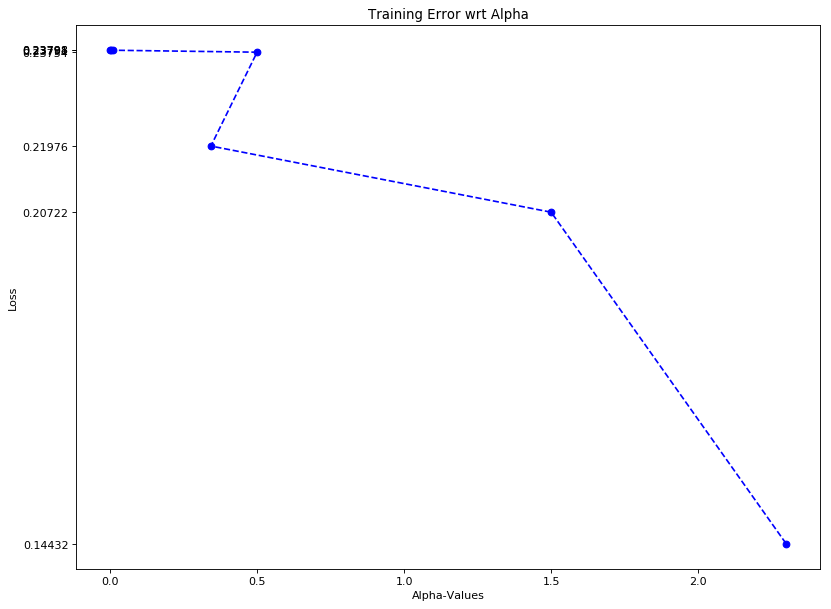

In [90]:
dir = "data"
file = "TicTacToeData.csv"

filename = os.path.join(dir,file)
columns = ['TL','TM','TR','ML','MM','MR','BL','BM','BR','Result']

df = pd.read_csv(filename, names = columns) #b = 0.21 (blank) x = 0.22 (player x) o = 0.23 (player o)
df = df.sample(frac=1).reset_index(drop=True) #shuffling rows
    
    
X = df[['TL','TM','TR','ML','MM','MR','BL','BM','BR']].as_matrix() #features values

X = X.T
 
m = X.shape[1] # Number of data points

W = np.array([np.random.rand(9)]) # Transposed 

b = random.random()

Y = np.array([df['Result']]) # Ground Truth


A = []

error = []
Alpha = [0.00002,0.002,0.01111,0.5,0.343,1.5,2.3]


for i in range(len(Alpha)):

    Z = np.dot(W,X) + b

    A =[]
    
    for col in Z.T:
        A.append(sigmoid(col))

    A = np.array([A])   

    dz = A - Y

    db = np.sum(dz)/m
    
    dw = np.dot(X,dz.T)/m

    dw = dw.T

    W = W - (np.dot(dw,Alpha[i]))

    b = b - (np.dot(db,Alpha[i]))
    error.append(db)


plt.figure(num=None, figsize=(12, 9), dpi=80)
plt.plot(Alpha, error,'--bo')
plt.title("Training Error wrt Alpha")
plt.xlabel("Alpha-Values")
plt.ylabel("Loss")
plt.yticks(error)
plt.show()
    
